# **`Credit Card Fraud Detection EDA`**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from zipfile import ZipFile
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

`About Dataset`

Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.## Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

on
Some ideas for exploration:

How does the probability of default payment vary by categories <br>of different demographic variables?
Which variables are the stro<br>ngest predictors <br>of default payment?
Acknowledgements
Any publications based on this dat<br>aset should acknowledge the following:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found here at the UCI Machine Learning Repository.

In [2]:
with ZipFile('data/UCI_Credit_Card.csv.zip') as zf:
    zf.extractall('data')

In [3]:
df = pd.read_csv("data/UCI_Credit_Card.csv")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Exploratory Data Analysis

In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### Insight:
* No null values

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


#### Insight:
* Categorical and Numerical features are mixed 
* Scaling required

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

#### insight:
* 3000 total data points
* 24 features
* Target is categorical in nature therefore classification problem
* Majority features are continous in nature

In [9]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

## Indentifying the categorical columns

In [10]:
categories = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in categories:
    print({i:df[i].unique()})
    df[i] = pd.Categorical(df[i])

{'SEX': array([2, 1], dtype=int64)}
{'EDUCATION': array([2, 1, 3, 5, 4, 6, 0], dtype=int64)}
{'MARRIAGE': array([1, 2, 3, 0], dtype=int64)}
{'PAY_0': array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)}
{'PAY_2': array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8], dtype=int64)}
{'PAY_3': array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8], dtype=int64)}
{'PAY_4': array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8], dtype=int64)}
{'PAY_5': array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)}
{'PAY_6': array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5], dtype=int64)}


#### Insight:
* Categorical features are unevenly scaled.
* Need to merge -2 , -1 and 0 into one category

## Univariate Analysis

## Categorical Columns

<Axes: xlabel='SEX'>

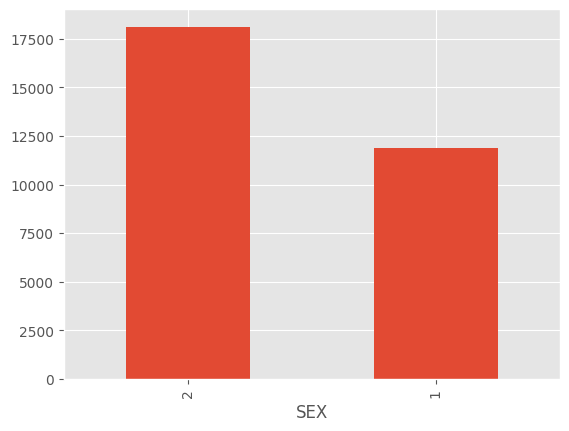

In [11]:
df['SEX'].value_counts().plot(kind='bar')

#### Insight:
* More female defaulters

<Axes: xlabel='EDUCATION'>

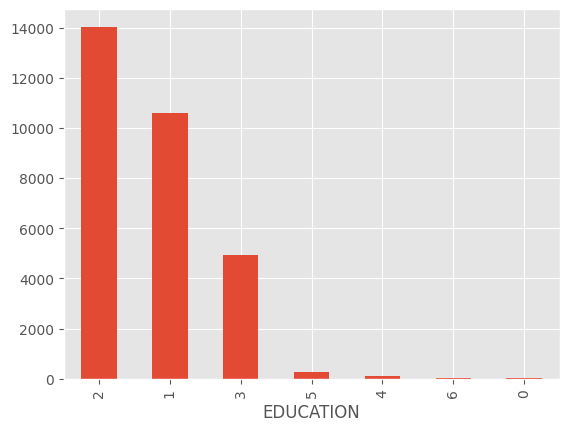

In [12]:
df['EDUCATION'].value_counts().plot(kind='bar')

#### Insight:
* University education is highest group followed by graduate and high school

## Numerical Columns

In [13]:
# Define function for histograms
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

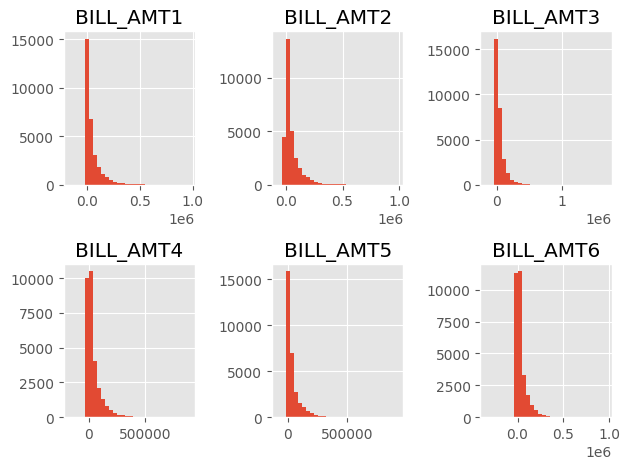

In [14]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 30)

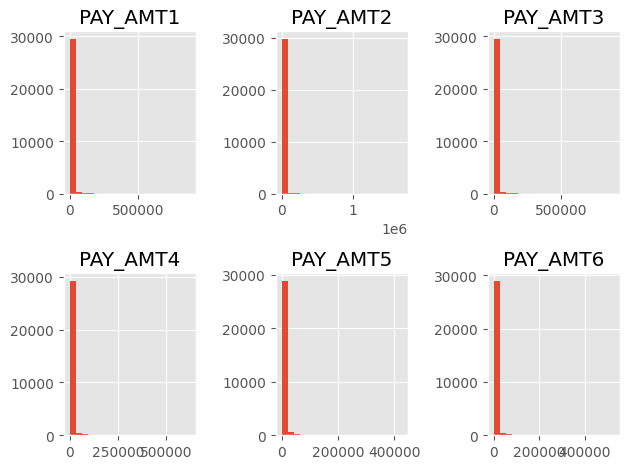

In [15]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

<Axes: >

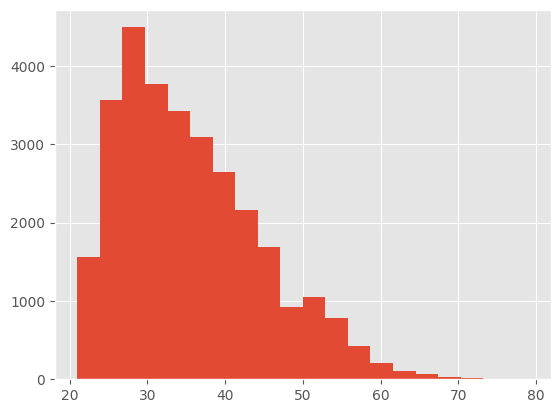

In [16]:
df["AGE"].hist(bins=20)

<Axes: >

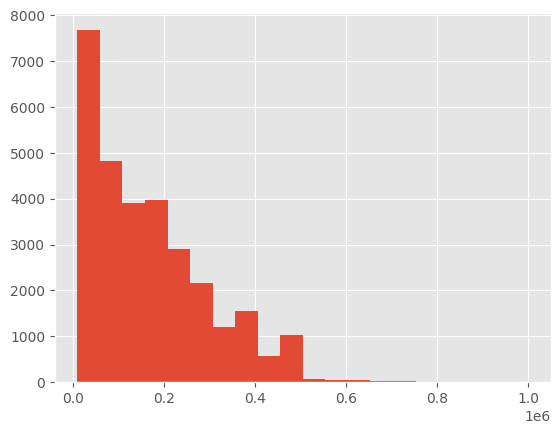

In [17]:
df['LIMIT_BAL'].hist(bins=20)

#### Insight:
* All numerical fetures appear skewed therefore requires normailty testing

## BIVARIATE ANALYSIS (TARGET DEPENDENT)

In [18]:
from scipy.stats import shapiro # test for normality

In [19]:
def draw_sns_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(12,8))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=df , x = var_name , hue= "default.payment.next.month",kde=True,ax=ax )
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [20]:
def shapiro_test(df,var):
    for i in var:
        _ , p = shapiro(df[i])
        print(f"{i} : {p}")
        if p>0.05:
            print('Normal Distribution')
        else:
            print("Skewed Distribution")
        print("-"*20)

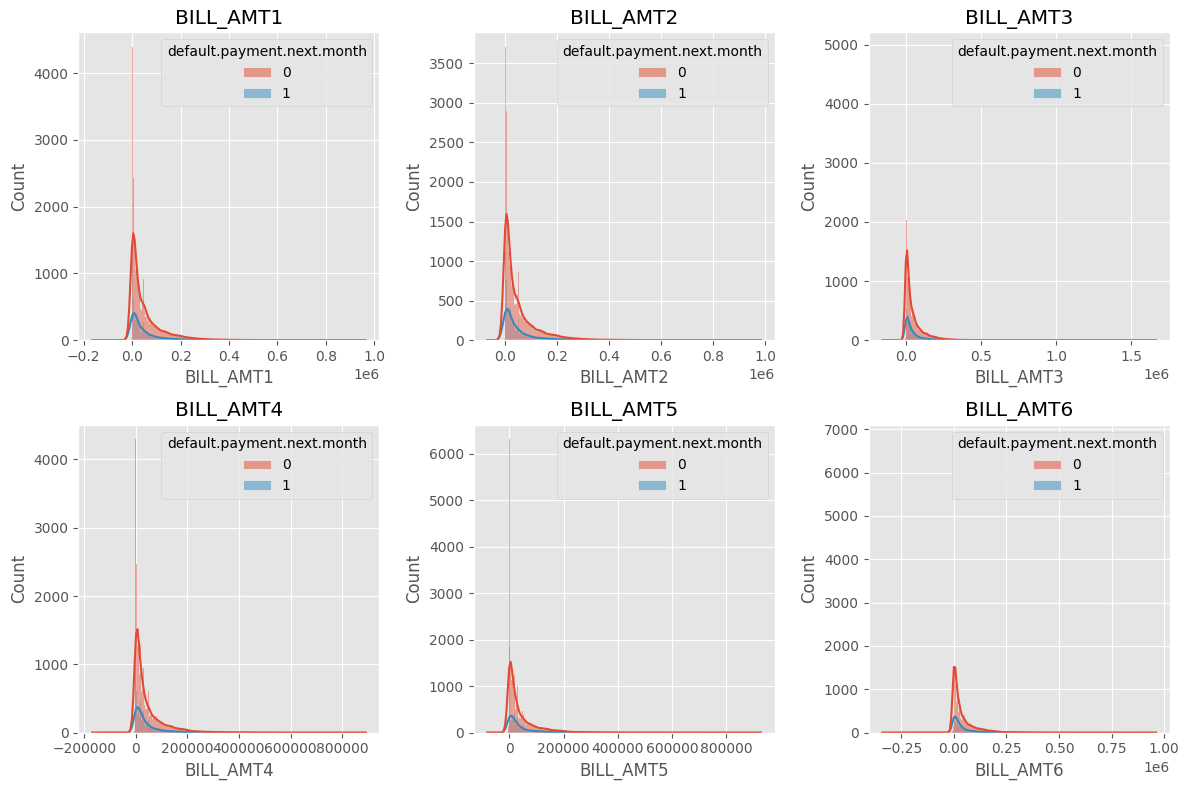

In [21]:
draw_sns_histograms(df, bills.columns ,2, 3 )

In [22]:
shapiro_test(bills,bills.columns)

BILL_AMT1 : 0.0
Skewed Distribution
--------------------
BILL_AMT2 : 0.0
Skewed Distribution
--------------------
BILL_AMT3 : 0.0
Skewed Distribution
--------------------
BILL_AMT4 : 0.0
Skewed Distribution
--------------------
BILL_AMT5 : 0.0
Skewed Distribution
--------------------
BILL_AMT6 : 0.0
Skewed Distribution
--------------------


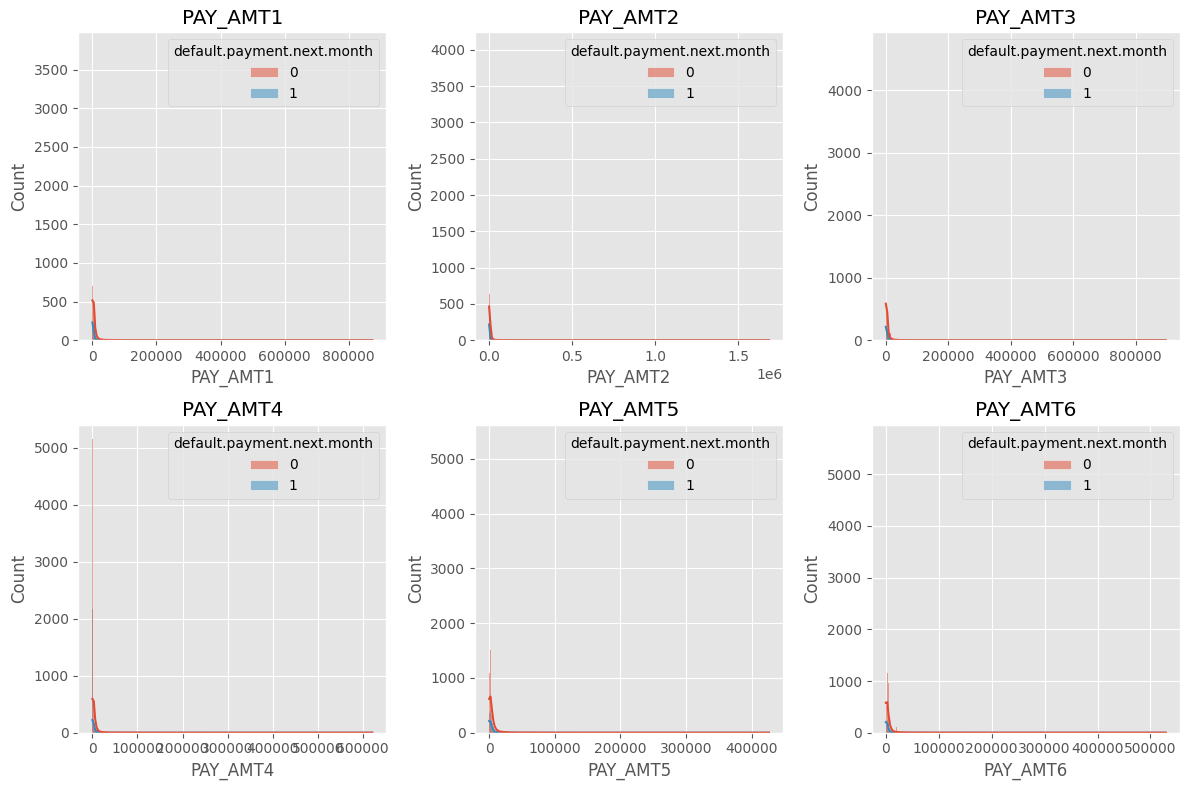

In [23]:
draw_sns_histograms(df, pay.columns ,2, 3 )

In [24]:
shapiro_test(pay,pay.columns)

PAY_AMT1 : 0.0
Skewed Distribution
--------------------
PAY_AMT2 : 0.0
Skewed Distribution
--------------------
PAY_AMT3 : 0.0
Skewed Distribution
--------------------
PAY_AMT4 : 0.0
Skewed Distribution
--------------------
PAY_AMT5 : 0.0
Skewed Distribution
--------------------
PAY_AMT6 : 0.0
Skewed Distribution
--------------------


#### Insight:
* Shapiro test confirms the skewedness of the distribution
* Proportion of defaulters are lesser among all features

## Log - transform numerical columns to convert them into normal data

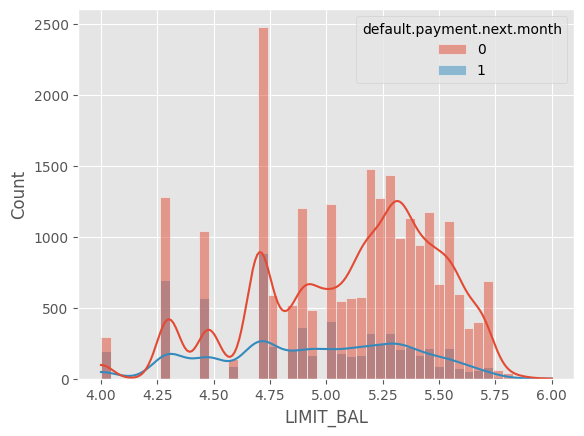

{'LIMIT_BAL': 0.0}


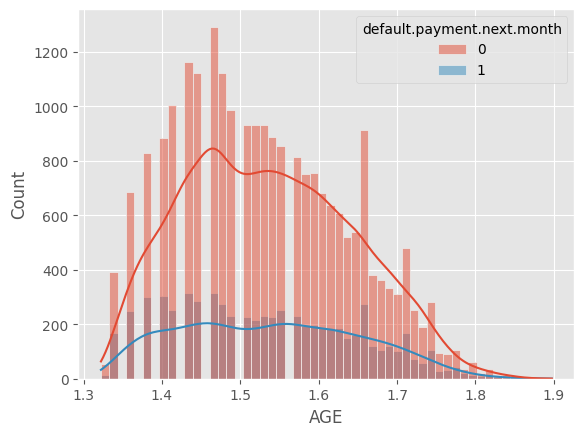

{'AGE': 0.0}


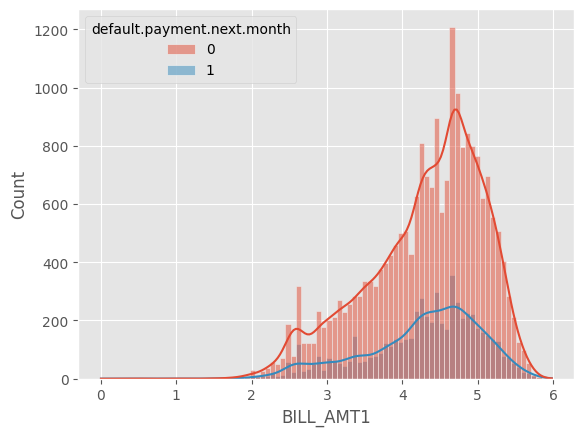

{'BILL_AMT1': 1.0}


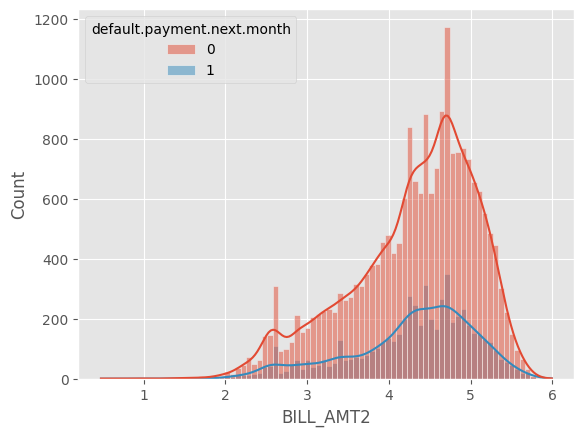

{'BILL_AMT2': 1.0}


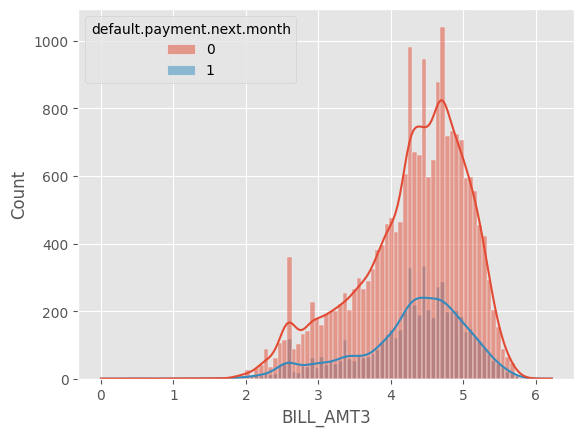

{'BILL_AMT3': 1.0}


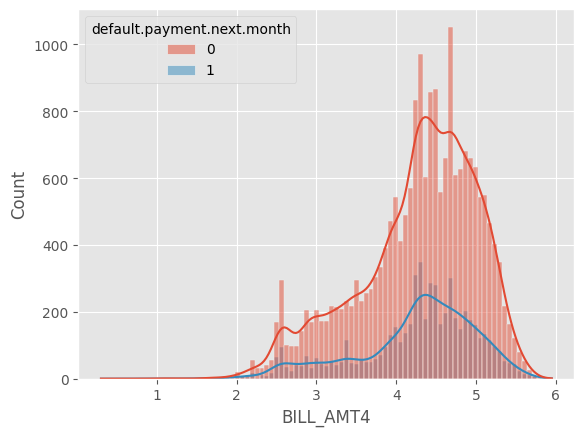

{'BILL_AMT4': 1.0}


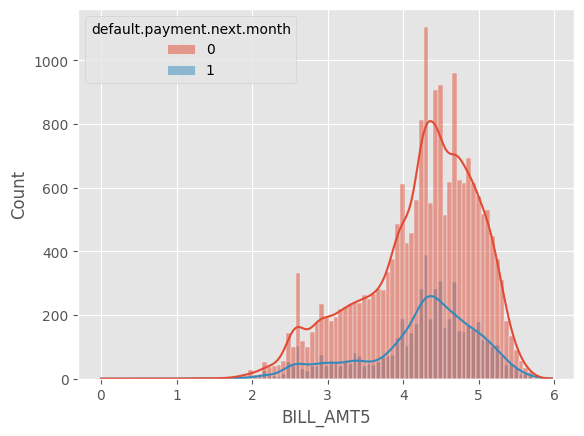

{'BILL_AMT5': 1.0}


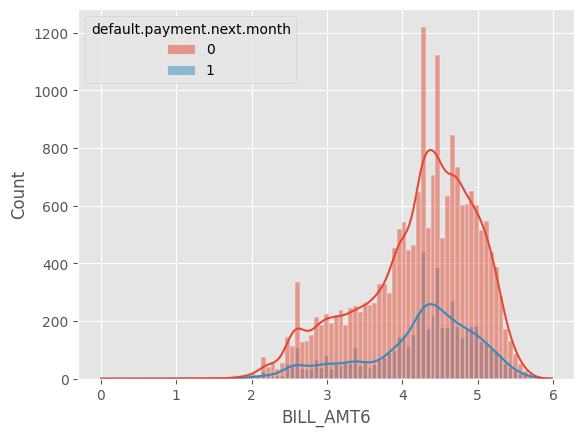

{'BILL_AMT6': 1.0}


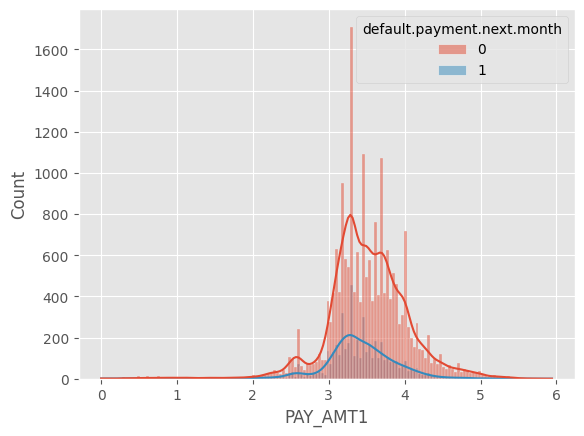

{'PAY_AMT1': 1.0}


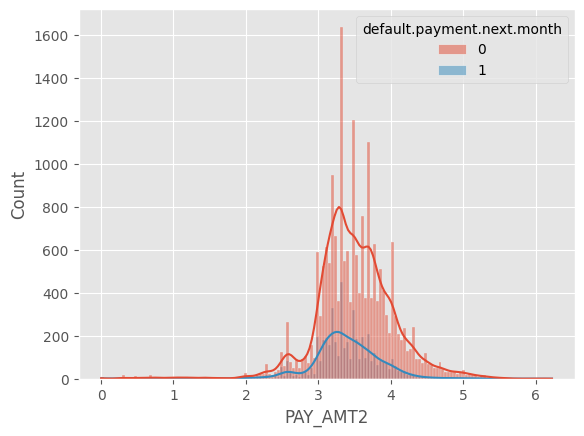

{'PAY_AMT2': 1.0}


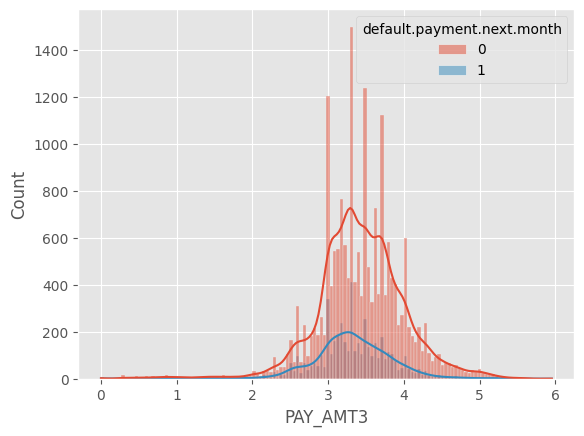

{'PAY_AMT3': 1.0}


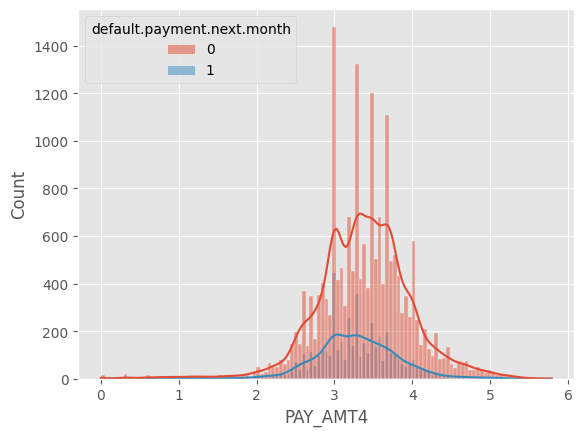

{'PAY_AMT4': 1.0}


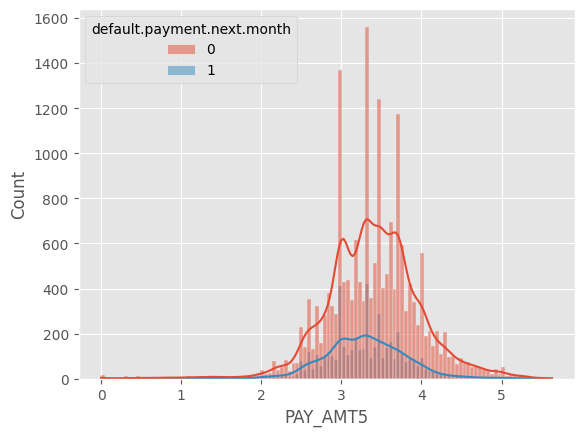

{'PAY_AMT5': 1.0}


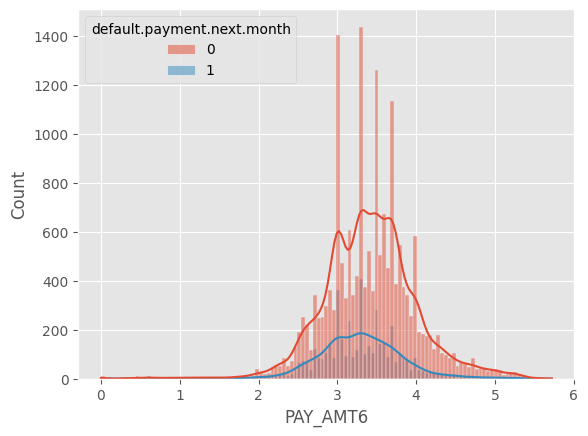

{'PAY_AMT6': 1.0}


In [25]:
# Data after log transformation
for i in df.columns:
    if i not in categories and i != "default.payment.next.month" :
        x = np.log10(df[i])
        sns.histplot(data=df , x = x , hue= "default.payment.next.month",kde=True )
        plt.show()
        _ , p = shapiro(x)
        print({i:p})

# Target analysis

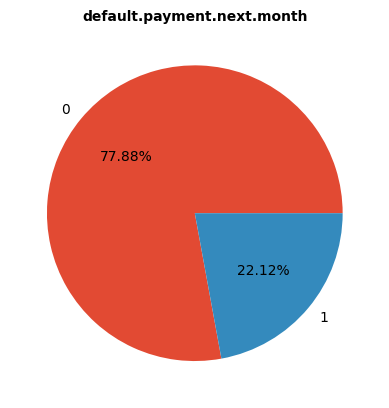

In [26]:
target =   df["default.payment.next.month"].value_counts()
plt.pie(x= target.values, labels= target.index , autopct="%.2f%%")
plt.title("default.payment.next.month",size=10,weight="bold")
plt.show()

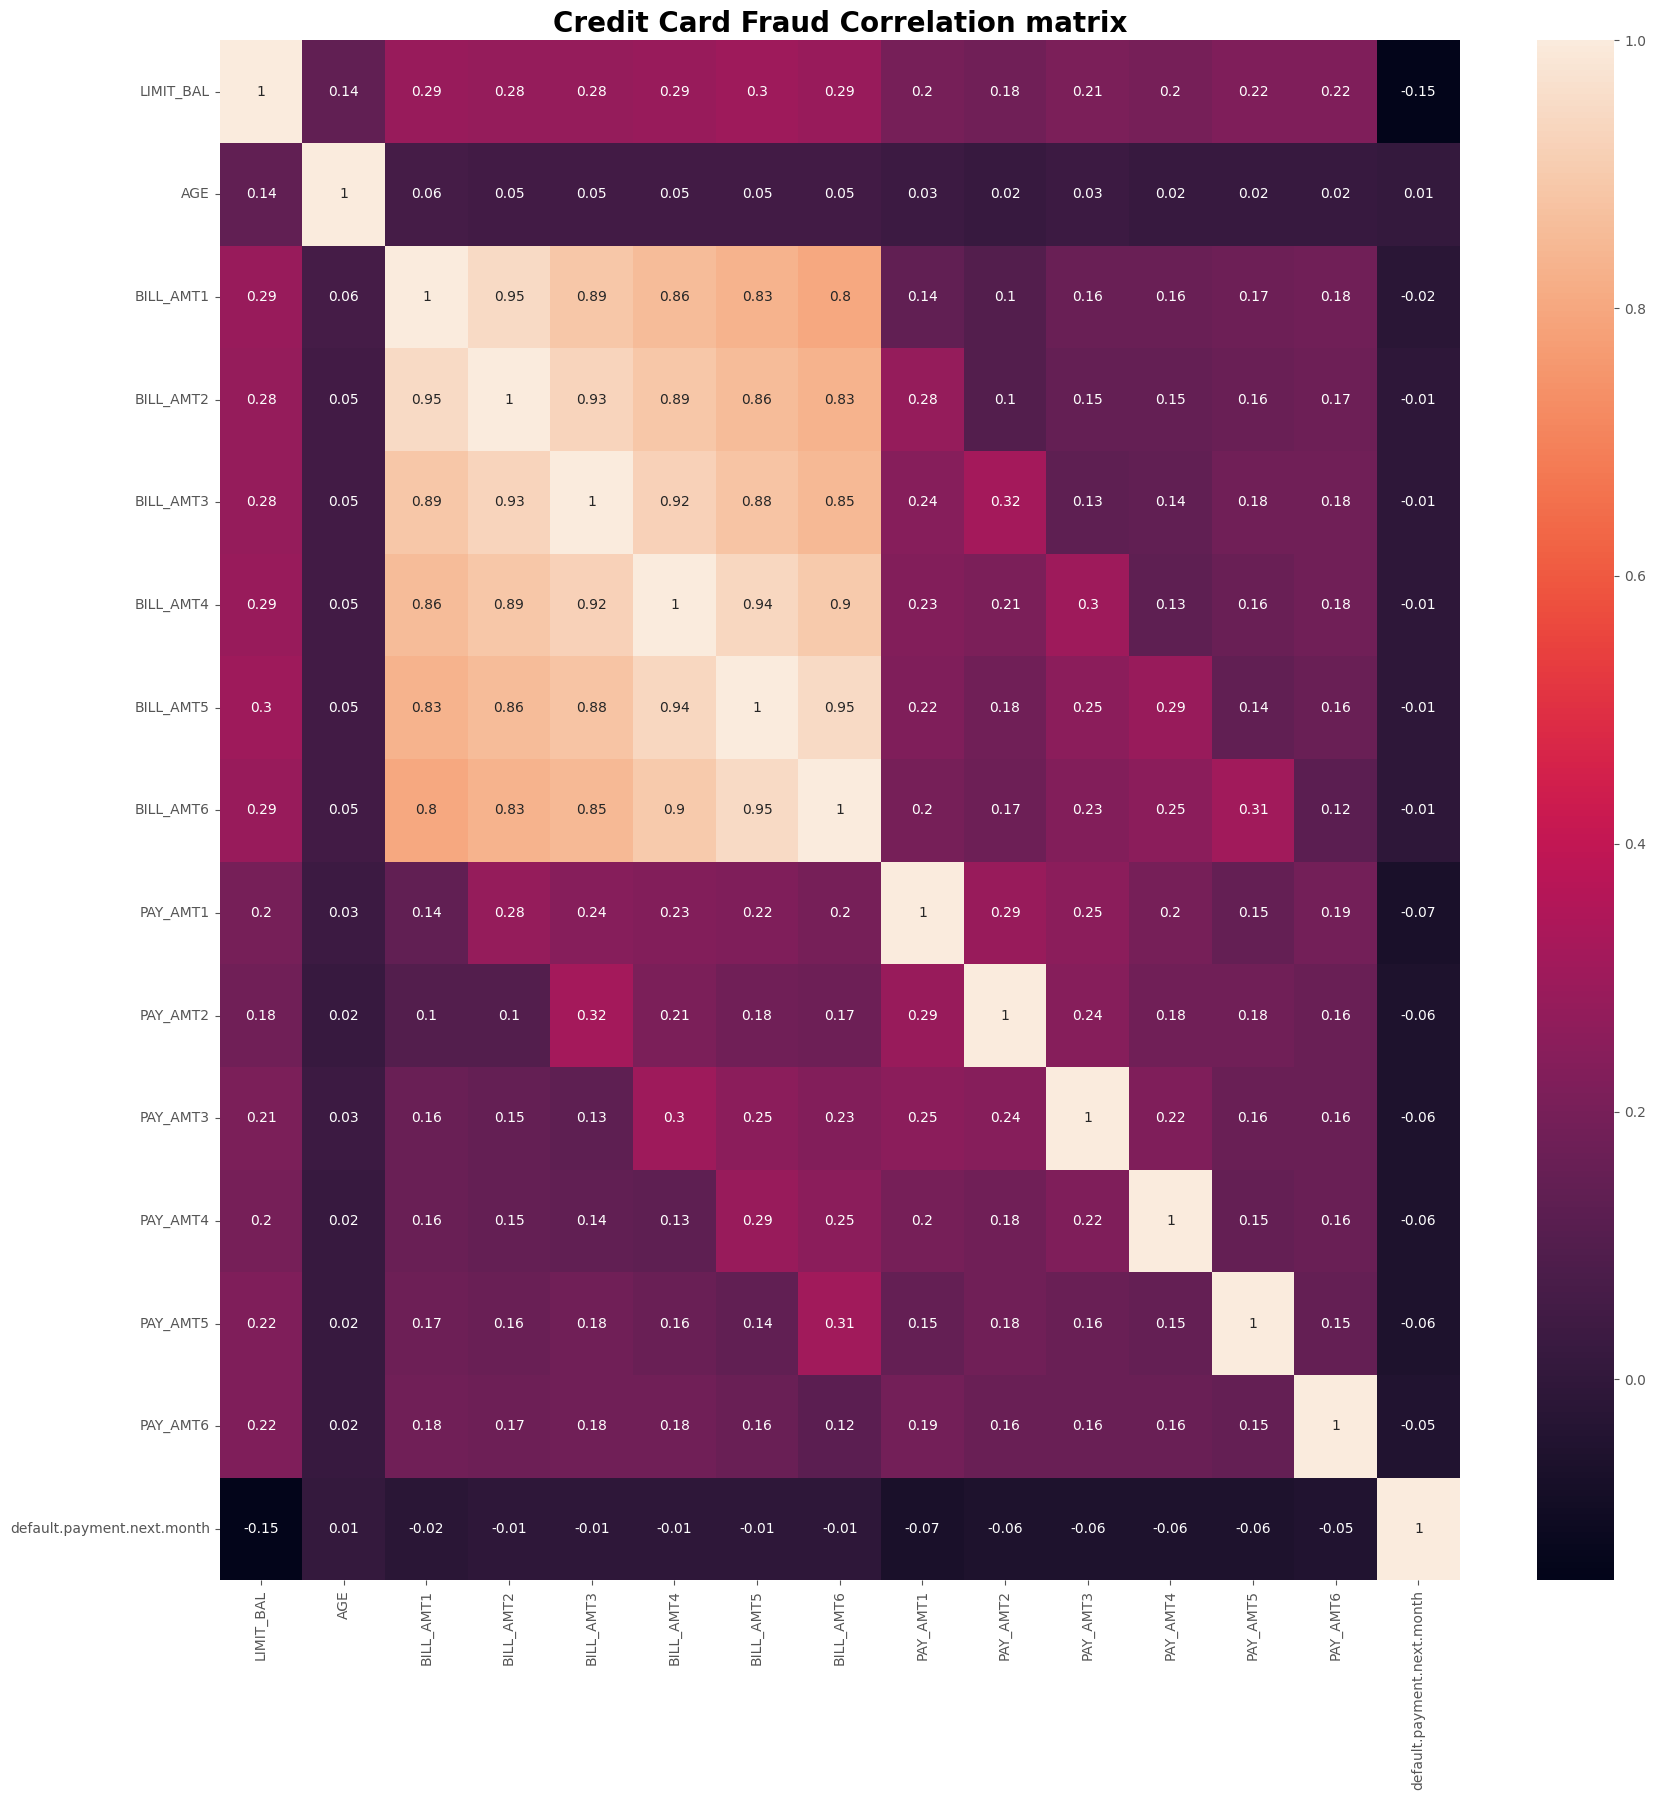

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(df[[x for x in df.columns if x not in categories ]].corr().round(2),annot=True)
plt.title('Credit Card Fraud Correlation matrix' , fontsize = 20 , weight='bold')
plt.show()

## Bill amounts have high correlation with each other